In [1]:
import numpy as np
import pandas as pd


from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

from psql_functions import execQuery
from miss_data import add_missing_dates, add_missing_counts
from make_plots import dict_error_plot_epsilons, dict_error_plot_n

import warnings
warnings.filterwarnings('ignore')

import sys
import os
import re
owd = os.getcwd()

In [2]:
param_dic = {
    "host"      : "localhost",
    "database"  : "bachelorBesoeg2014",
    "user"      : "postgres",
    "password"  : "password",
    "port"      : "5432"
}

query = """select time_ from _775147;"""
result = execQuery(param_dic, query)
dates = [(date[0]) for date in result]

query = """select count_ from _775147;"""
result = execQuery(param_dic, query)

counts = [(count[0]) for count in result]

all_dates = add_missing_dates(dates)
all_counts =  add_missing_counts(counts, dates, all_dates)

n_data_structures = 2


Executed query and closed connection.
Executed query and closed connection.


In [3]:
onlydirs = [f for f in os.listdir(os.getcwd()) if os.path.isdir(os.path.join(os.getcwd(), f)) and f[0] != '.']

In [4]:
onlydirs

['Data', 'plots', 'range_queries', 'results', '__pycache__']

In [5]:
def make_result_dict(epsilons, n):
    epsilon_dict = dict.fromkeys(epsilons)
    for e_key in epsilon_dict:
        epsilon_dict[e_key] = dict.fromkeys(n)
    return epsilon_dict


def fill_up_result_dict(epsilons, n, path, files):
    dict_ = make_result_dict(epsilons, n)
    for idx, f in enumerate(files):
        e = re.search(r'e=[-+]?[0-9]*\.?[0-9]*', f).group(0)
        e = e.split("e=")[1]
        N = re.search(r'N=\d+', f).group(0)
        N = N.split("N=")[1]

        res = np.loadtxt(path + f, delimiter=',').copy()
        dict_[float(e)][int(N)] = res
    return dict_

def find_error_different_queries(est, cor):
    erorrs = est - cor
    max_error = np.amax(erorrs)
    min_error = np.amin(erorrs)
    rmse = mean_squared_error(cor, est, squared = False)
    error_dict = {'rmse': rmse, 'max': max_error, 'min': min_error, 'abs': np.mean(erorrs)}
    return error_dict

In [6]:
def load_split_est_n_cor_files(path):
    files_cor = [f for f in os.listdir(path) if re.match(r'.*(cor).*\.csv', f)]
    
    files_est = [f for f in os.listdir(path) if re.match(r'.*(est).*\.csv', f)]
    
    est_full = [f for f in files_est if re.match(r'(full_).*\.csv', f)]
    
    est_half = [f for f in files_est if re.match(r'(half_).*\.csv', f)]

    est_full_flat =  [f for f in est_full if re.match(r'.*(_flat_).*\.csv', f)]
    est_full_hh =  [f for f in est_full if re.match(r'.*(_hh_).*\.csv', f)]

    est_half_flat =  [f for f in est_half if re.match(r'.*(_flat_).*\.csv', f)]
    est_half_hh =  [f for f in est_half if re.match(r'.*(_hh_).*\.csv', f)]
    
    cor_full = [f for f in files_cor if re.match(r'(full_).*\.csv', f)]
    #Where hh beats flat
    cor_half = [f for f in files_cor if re.match(r'(half_).*\.csv', f)]
    
    
    return est_full_flat, est_full_hh, est_half_flat, est_half_hh, cor_full, cor_half


In [7]:
def make_flat_errors_dict(epsilons, n):
    epsilon_dict = dict.fromkeys(epsilons)
    
    model_dicts = []
    for i in range(0,len(n)*len(epsilons)):
        model_dict = dict.fromkeys(['flat', 'hh'])

        model_dicts.append(model_dict)
    
    i = 0
    j = 0
    for e_key in epsilon_dict:
        #print(e_key)
        epsilon_dict[e_key] = dict.fromkeys(n)
        n_dict = epsilon_dict[e_key]
        #print(epsilon_dict[e_key])
        for n_key in n_dict:
            n_dict[n_key] = model_dicts[j]
            j = j + 1
        i = i + 1
    return epsilon_dict

def fill_up_errors_dict(epsilons, n, flat_est_dict, hh_est_dict, cor_dict):
    dict_ = make_flat_errors_dict(epsilons, n)
    for e in epsilons:
        for N in n:

            cor = cor_dict[e][N]
            flat_est = flat_est_dict[e][N]
            dict_[e][N]['flat'] = find_error_different_queries(flat_est, cor) 
            
   
            hh_est = hh_est_dict[e][N]
            dict_[e][N]['hh'] = find_error_different_queries(hh_est, cor) 


    return dict_
"""
est_full_flat_dict 
est_full_hh_dict 

est_half_flat_dict 
est_half_hh_dict

cor_full_dict
cor_half_dict 

i = 0
    j = 0
    for e_key in epsilon_dict:
        #print(e_key)
        epsilon_dict[e_key] = n_dicts[i]
        n_dict = epsilon_dict[e_key]
        #print(epsilon_dict[e_key])
        for n_key in n_dict:
            n_dict[n_key] = model_dicts[j]
            n_dict[n_key]['flat'] = dict.fromkeys(degrees)
            n_dict[n_key]['hh'] = dict.fromkeys(degrees)
            j = j + 1
        i = i + 1
        #print(epsilon_dict)
"""
#make_flat_errors_dict(epsilons, n)


"\nest_full_flat_dict \nest_full_hh_dict \n\nest_half_flat_dict \nest_half_hh_dict\n\ncor_full_dict\ncor_half_dict \n\ni = 0\n    j = 0\n    for e_key in epsilon_dict:\n        #print(e_key)\n        epsilon_dict[e_key] = n_dicts[i]\n        n_dict = epsilon_dict[e_key]\n        #print(epsilon_dict[e_key])\n        for n_key in n_dict:\n            n_dict[n_key] = model_dicts[j]\n            n_dict[n_key]['flat'] = dict.fromkeys(degrees)\n            n_dict[n_key]['hh'] = dict.fromkeys(degrees)\n            j = j + 1\n        i = i + 1\n        #print(epsilon_dict)\n"

In [8]:
epsilons = np.array([1.4, 1.2, 1, 0.8, 0.6, 0.4])
n = np.array([32, 128, 256, 512, 1024, 2048])

# Loading the data 

In [9]:
#C:\Users\Jonas Friis\Documents\Universitet\Bachelors-Thesis\src\results\sample_querys\local_hh
os.chdir(os.getcwd()+'/'+'results/max_hh/')
os.getcwd()

'C:\\Users\\Jonas Friis\\Documents\\Universitet\\Bachelors-Thesis\\src\\results\\max_hh'

In [10]:
path =  owd +'/'+'results/max_hh/'
files = os.listdir(path)
est_full_flat, est_full_hh, est_half_flat, est_half_hh, cor_full, cor_half = load_split_est_n_cor_files(path)


In [11]:
#print(est_full_flat)
#print(est_full_hh)
print(est_half_flat)
print(est_half_hh)
#print(cor_full)
print(cor_half)

['half_flat_est_e=0.4_N=1024.csv', 'half_flat_est_e=0.4_N=128.csv', 'half_flat_est_e=0.4_N=2048.csv', 'half_flat_est_e=0.4_N=256.csv', 'half_flat_est_e=0.4_N=32.csv', 'half_flat_est_e=0.4_N=512.csv', 'half_flat_est_e=0.6_N=1024.csv', 'half_flat_est_e=0.6_N=128.csv', 'half_flat_est_e=0.6_N=2048.csv', 'half_flat_est_e=0.6_N=256.csv', 'half_flat_est_e=0.6_N=32.csv', 'half_flat_est_e=0.6_N=512.csv', 'half_flat_est_e=0.8_N=1024.csv', 'half_flat_est_e=0.8_N=128.csv', 'half_flat_est_e=0.8_N=2048.csv', 'half_flat_est_e=0.8_N=256.csv', 'half_flat_est_e=0.8_N=32.csv', 'half_flat_est_e=0.8_N=512.csv', 'half_flat_est_e=1.0_N=1024.csv', 'half_flat_est_e=1.0_N=128.csv', 'half_flat_est_e=1.0_N=2048.csv', 'half_flat_est_e=1.0_N=256.csv', 'half_flat_est_e=1.0_N=32.csv', 'half_flat_est_e=1.0_N=512.csv', 'half_flat_est_e=1.2_N=1024.csv', 'half_flat_est_e=1.2_N=128.csv', 'half_flat_est_e=1.2_N=2048.csv', 'half_flat_est_e=1.2_N=256.csv', 'half_flat_est_e=1.2_N=32.csv', 'half_flat_est_e=1.2_N=512.csv', 'hal

In [12]:
est_full_flat_dict = fill_up_result_dict(epsilons, n, path, est_full_flat)
est_full_hh_dict = fill_up_result_dict(epsilons, n, path, est_full_hh)

est_half_flat_dict = fill_up_result_dict(epsilons, n, path, est_half_flat)
est_half_hh_dict = fill_up_result_dict(epsilons, n, path, est_half_hh)

cor_full_dict = fill_up_result_dict(epsilons, n, path, cor_full)
cor_half_dict = fill_up_result_dict(epsilons, n, path, cor_half)


In [13]:
"""
print(est_full_flat_dict)
print('___________')
print(est_full_hh_dict)
print('___________')
print(est_half_flat_dict)
print('___________')
print(est_half_hh_dict)
print('___________')
print(cor_full_dict)
print('___________')
print(cor_half_dict)
"""

"\nprint(est_full_flat_dict)\nprint('___________')\nprint(est_full_hh_dict)\nprint('___________')\nprint(est_half_flat_dict)\nprint('___________')\nprint(est_half_hh_dict)\nprint('___________')\nprint(cor_full_dict)\nprint('___________')\nprint(cor_half_dict)\n"

In [14]:
half_errors_dict = fill_up_errors_dict(epsilons, n, est_half_flat_dict, est_half_hh_dict, cor_half_dict)
for e_key in half_errors_dict:
    print(half_errors_dict[e_key])
print(half_errors_dict)

{32: {'flat': {'rmse': 393.56889929864775, 'max': 211.15742940678865, 'min': -514.981064697155, 'abs': -151.9118176451832}, 'hh': {'rmse': 131.14802157411407, 'max': -1.6020910817519507, 'min': -185.46439127167878, 'abs': -93.53324117671536}}, 128: {'flat': {'rmse': 3324.979256747414, 'max': -2335.859359912938, 'min': -4081.021338624474, 'abs': -3208.440349268706}, 'hh': {'rmse': 142.3587043653505, 'max': -94.3466170767897, 'min': -177.8502664134303, 'abs': -136.09844174511}}, 256: {'flat': {'rmse': 6213.886214911901, 'max': 7602.804967545955, 'min': -4407.053483814652, 'abs': 1597.8757418656514}, 'hh': {'rmse': 476.09301315483594, 'max': 42.63523680423168, 'min': -671.9459434599994, 'abs': -314.65535332788386}}, 512: {'flat': {'rmse': 18061.46261364845, 'max': 14212.69606017181, 'min': -21223.386492019086, 'abs': -3505.3452159236385}, 'hh': {'rmse': 1136.1131694433207, 'max': -149.07911951533606, 'min': -1599.77551040439, 'abs': -874.427314959863}}, 1024: {'flat': {'rmse': 28060.82539

In [15]:
def plot(xs, ys, N, epsilon, plot_name):
    plt.scatter(xs, ys)
    #plt.hlines(np.mean(answears128),line_range[0],line_range[1])
    #plt.hlines(np.mean(correct_answear),line_range[0],line_range[1])
    #plt.legend()
    plt.xlabel('Length of query')
    plt.ylabel('RMSE')
    plt.title(f'Flat OLH with N = {N} and \u03B5 = {epsilon}')
    #plt.savefig(plot_name,bbox_inches='tight')
    plt.show()

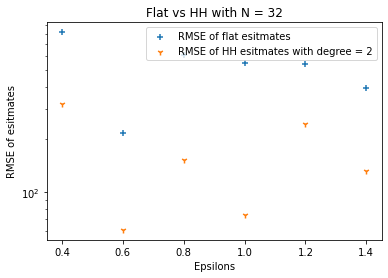

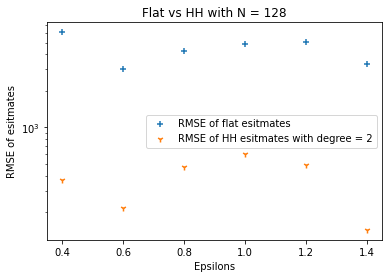

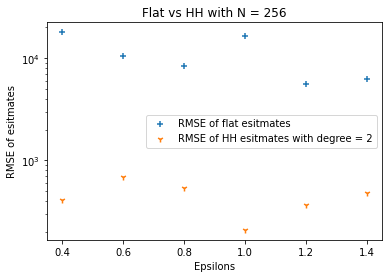

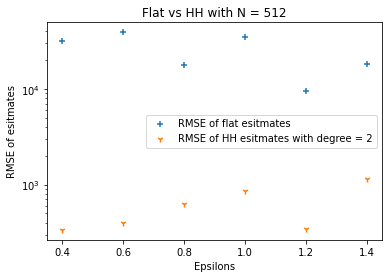

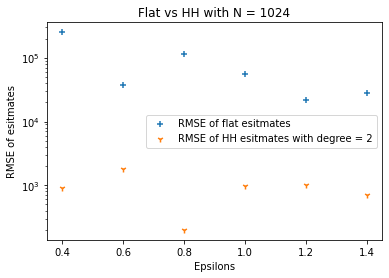

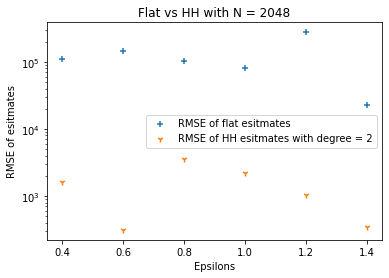

In [16]:
def plots_flat_hh(epsilons, n, error_dict):
    for N in n:
        rmse_flat = []
        rmse_hh = []
        for e in epsilons:
            #plt.savefig(plot_name,dpi=300,bbox_inches='tight')
            rmse = half_errors_dict[e][N]['flat']['rmse']
            rmse_flat.append(rmse)
            #plt.scatter(e, rmse, marker = '+', label=f"RMSE of flat esitmates with \u03B5 = {e}")

            rmse = half_errors_dict[e][N]['hh']['rmse']
            rmse_hh.append(rmse)

                #plt.scatter(e, rmse, marker = 'o', label=f"RMSE of HH esitmates with degree = {degree} and \u03B5 = {e}")
        plt.scatter(epsilons, rmse_flat, marker = '+', label=f"RMSE of flat esitmates")
        plt.scatter(epsilons, rmse_hh, marker = '1', label=f"RMSE of HH esitmates with degree = {2}")


        plt.yscale('log')

        plt.legend()
        plt.xlabel('Epsilons')
        plt.ylabel('RMSE of esitmates')

        plt.title(f'Flat vs HH with N = {N}')
        plt.show()

plots_flat_hh(epsilons, n, half_errors_dict)

In [17]:
def same_parameter(answers, correct_answer):
    error = np.abs(correct_answer-answers)
    max_error = np.amax(error)
    min_error = np.amin(error)
    true_values = np.full(len(answers), correct_answer)
    mse = mean_squared_error(true_values, answers, squared = False)
    error_dict = {'mse': mse, 'max': max_error, 'min': min_error, 'abs': np.mean(error)}
    
    return error_dict


In [18]:
print(flat_empty)
print(len(flat_empty))
print(hh_empty)
print(len(hh_empty))

NameError: name 'flat_empty' is not defined

In [ ]:
epsilon_error_dicts = {}
for idx, e in enumerate(epsilons):
    epsilon_error_dicts[e] = same_parameter(epsilons_res[idx], correct_answer)

In [ ]:
epsilon_error_dicts

In [ ]:
plt_name = 'flat_freq_epsilon'
dict_error_plot_epsilons(epsilon_error_dicts,plt_name, epsilons)

In [ ]:
n_error_dicts = {}
for idx, N in enumerate(n):
    n_error_dicts[N] = same_parameter(ns[idx], correct_answer)



In [ ]:
n_error_dicts

In [ ]:
print(n)
plt_name = 'flat_freq_N'
dict_error_plot_n(n_error_dicts,plt_name, n)